<a href="https://colab.research.google.com/github/ravigithub51/colabrepo/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip -q install streamlit
!pip -q install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [3]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

test_files_greenmould = "/content/drive/MyDrive/mushdata/test/greenmould"
test_files_bacterialblotch = "/content/drive/MyDrive/mushdata/test/bacterialblotch"
test_files_drybubble = "/content/drive/MyDrive/mushdata/test/drybubble"
test_files_cobweb = "/content/drive/MyDrive/mushdata/test/cobweb"

train_files_greenmould = "/content/drive/MyDrive/mushdata/train/greenmould"
train_files_bacterialblotch = "/content/drive/MyDrive/mushdata/train/bacterialblotch"
train_files_drybubble = "/content/drive/MyDrive/mushdata/train/drybubble"
train_files_cobweb = "/content/drive/MyDrive/mushdata/train/cobweb"

valid_files_greenmould = "/content/drive/MyDrive/mushdata/validation/greenmould"
valid_files_bacterialblotch = "/content/drive/MyDrive/mushdata/validation/bacterialblotch"
valid_files_drybubble = "/content/drive/MyDrive/mushdata/validation/drybubble"
valid_files_cobweb = "/content/drive/MyDrive/mushdata/validation/cobweb"

print("Number of greenmould images in training set", total_files(train_files_greenmould))
print("Number of bacterialblotch images in training set", total_files(train_files_bacterialblotch))
print("Number of drybubble images in training set", total_files(train_files_drybubble))
print("Number of cobweb images in training set", total_files(train_files_cobweb))

print("========================================================")

print("Number of greenmould images in training set", total_files(train_files_greenmould))
print("Number of bacterialblotch images in training set", total_files(train_files_bacterialblotch))
print("Number of drybubble images in training set", total_files(train_files_drybubble))
print("Number of cobweb images in training set", total_files(train_files_cobweb))

print("========================================================")

print("Number of greenmould images in training set", total_files(train_files_greenmould))
print("Number of bacterialblotch images in training set", total_files(train_files_bacterialblotch))
print("Number of drybubble images in training set", total_files(train_files_drybubble))
print("Number of cobweb images in training set", total_files(train_files_cobweb))

Number of greenmould images in training set 10
Number of bacterialblotch images in training set 12
Number of drybubble images in training set 11
Number of cobweb images in training set 12
Number of greenmould images in training set 10
Number of bacterialblotch images in training set 12
Number of drybubble images in training set 11
Number of cobweb images in training set 12
Number of greenmould images in training set 10
Number of bacterialblotch images in training set 12
Number of drybubble images in training set 11
Number of cobweb images in training set 12


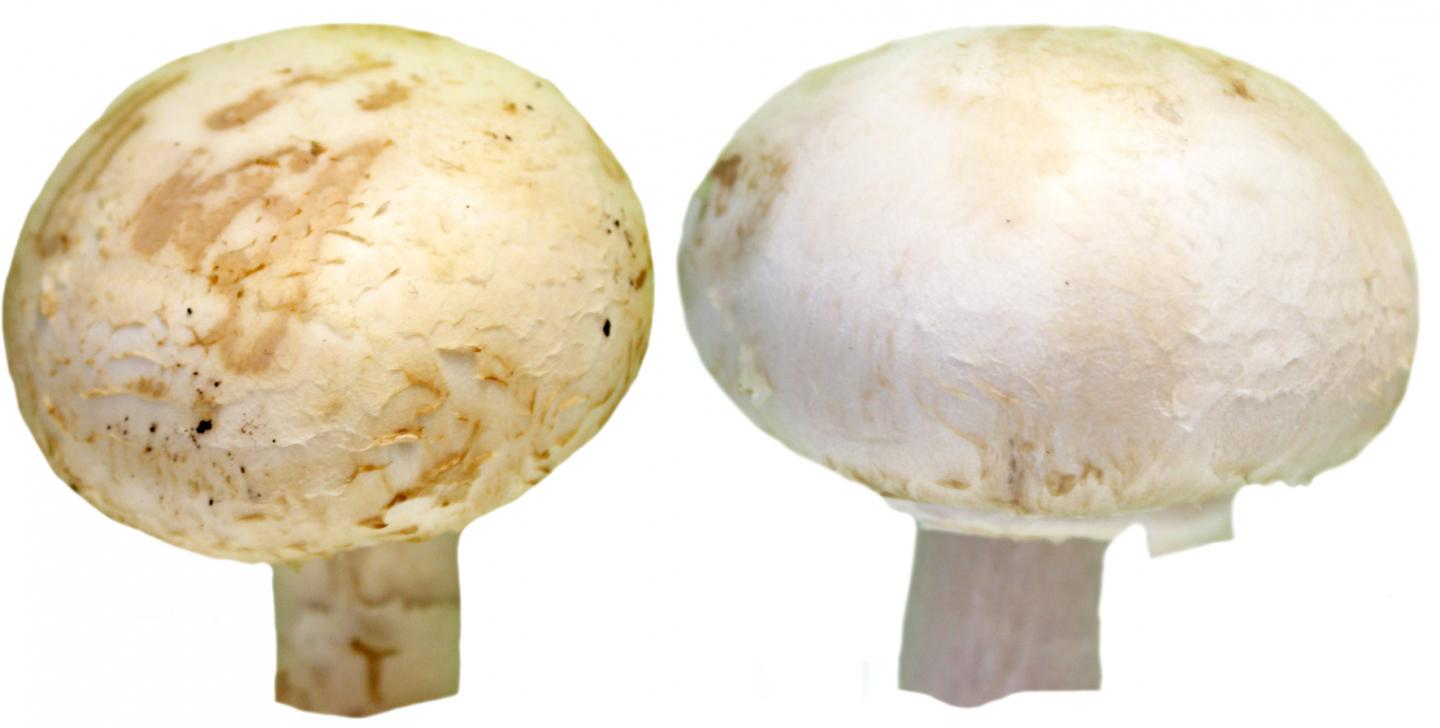

In [4]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/mushdata/train/bacterialblotch/241318_web.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

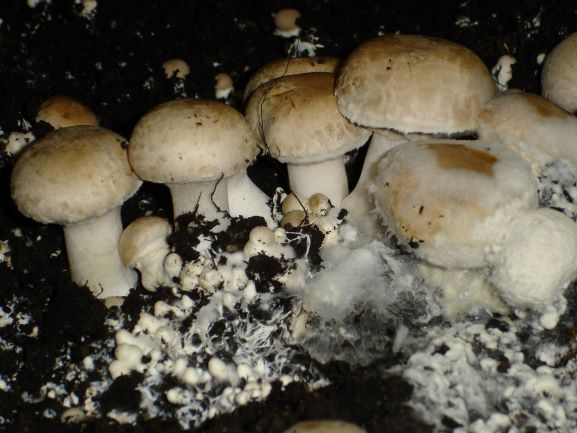

In [5]:
image_path = '/content/drive/MyDrive/mushdata/train/cobweb/Fig 6 cobweb.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/mushdata/train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/mushdata/validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 45 images belonging to 4 classes.
Found 35 images belonging to 4 classes.


In [8]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/mushdata/test',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


Found 44 images belonging to 4 classes.


In [9]:
"""from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))"""
"""from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))  # Additional convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Additional fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))"""
"""from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))"""

# Compile the model
"""optimizer = Adam(lr=0.001)  # Adjust learning rate if necessary
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=20,  # Increase number of epochs
                    validation_data=validation_generator,
                    )"""



"optimizer = Adam(lr=0.001)  # Adjust learning rate if necessary\nmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])\n\n# Train the model\nhistory = model.fit(train_generator,\n                    epochs=20,  # Increase number of epochs\n                    validation_data=validation_generator,\n                    )"

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Function to define and train a single model
def define_train_model(train_generator, validation_generator):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_generator,
                        batch_size=32,
                        epochs=20,
                        validation_data=validation_generator,
                        verbose=0)

    return model

# Function to generate predictions using multiple models and average them
def ensemble_predict(models, test_generator):
    all_predictions = []
    for model in models:
        predictions = model.predict(test_generator)
        all_predictions.append(predictions)
    ensemble_predictions = np.mean(all_predictions, axis=0)
    return ensemble_predictions

# Train multiple models
num_models = 3
models = []
for i in range(num_models):
    model = define_train_model(train_generator, validation_generator)
    models.append(model)

# Generate predictions using the ensemble of models
ensemble_predictions = ensemble_predict(models, test_generator)

# Evaluate ensemble predictions
ensemble_loss, ensemble_accuracy = model.evaluate(test_generator)
print('Ensemble Loss:', ensemble_loss)
print('Ensemble Accuracy:', ensemble_accuracy)


2/2 [==============================] - 2s 337ms/step - loss: 1.3346 - accuracy: 0.4091
Ensemble Loss: 1.334614634513855
Ensemble Accuracy: 0.40909090638160706


In [11]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
"""history = model.fit(train_generator,
                    batch_size=4,
                    epochs=11,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )"""
history = model.fit(train_generator,
                    batch_size=4,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )


Epoch 1/20
2/2 [==============================] - 11s 7s/step - loss: 1.1506 - accuracy: 0.4667 - val_loss: 0.9950 - val_accuracy: 0.6000
Epoch 2/20
2/2 [==============================] - 7s 3s/step - loss: 1.0975 - accuracy: 0.4667 - val_loss: 0.9829 - val_accuracy: 0.6286
Epoch 3/20
2/2 [==============================] - 8s 6s/step - loss: 1.1522 - accuracy: 0.5556 - val_loss: 1.1543 - val_accuracy: 0.5429
Epoch 4/20
2/2 [==============================] - 9s 3s/step - loss: 1.0022 - accuracy: 0.5778 - val_loss: 0.8810 - val_accuracy: 0.6571
Epoch 5/20
2/2 [==============================] - 8s 6s/step - loss: 1.0627 - accuracy: 0.5556 - val_loss: 0.8425 - val_accuracy: 0.6857
Epoch 6/20
2/2 [==============================] - 8s 6s/step - loss: 1.0336 - accuracy: 0.5778 - val_loss: 0.8587 - val_accuracy: 0.6286
Epoch 7/20
2/2 [==============================] - 8s 4s/step - loss: 1.0483 - accuracy: 0.5778 - val_loss: 0.8347 - val_accuracy: 0.6571
Epoch 8/20
2/2 [========================

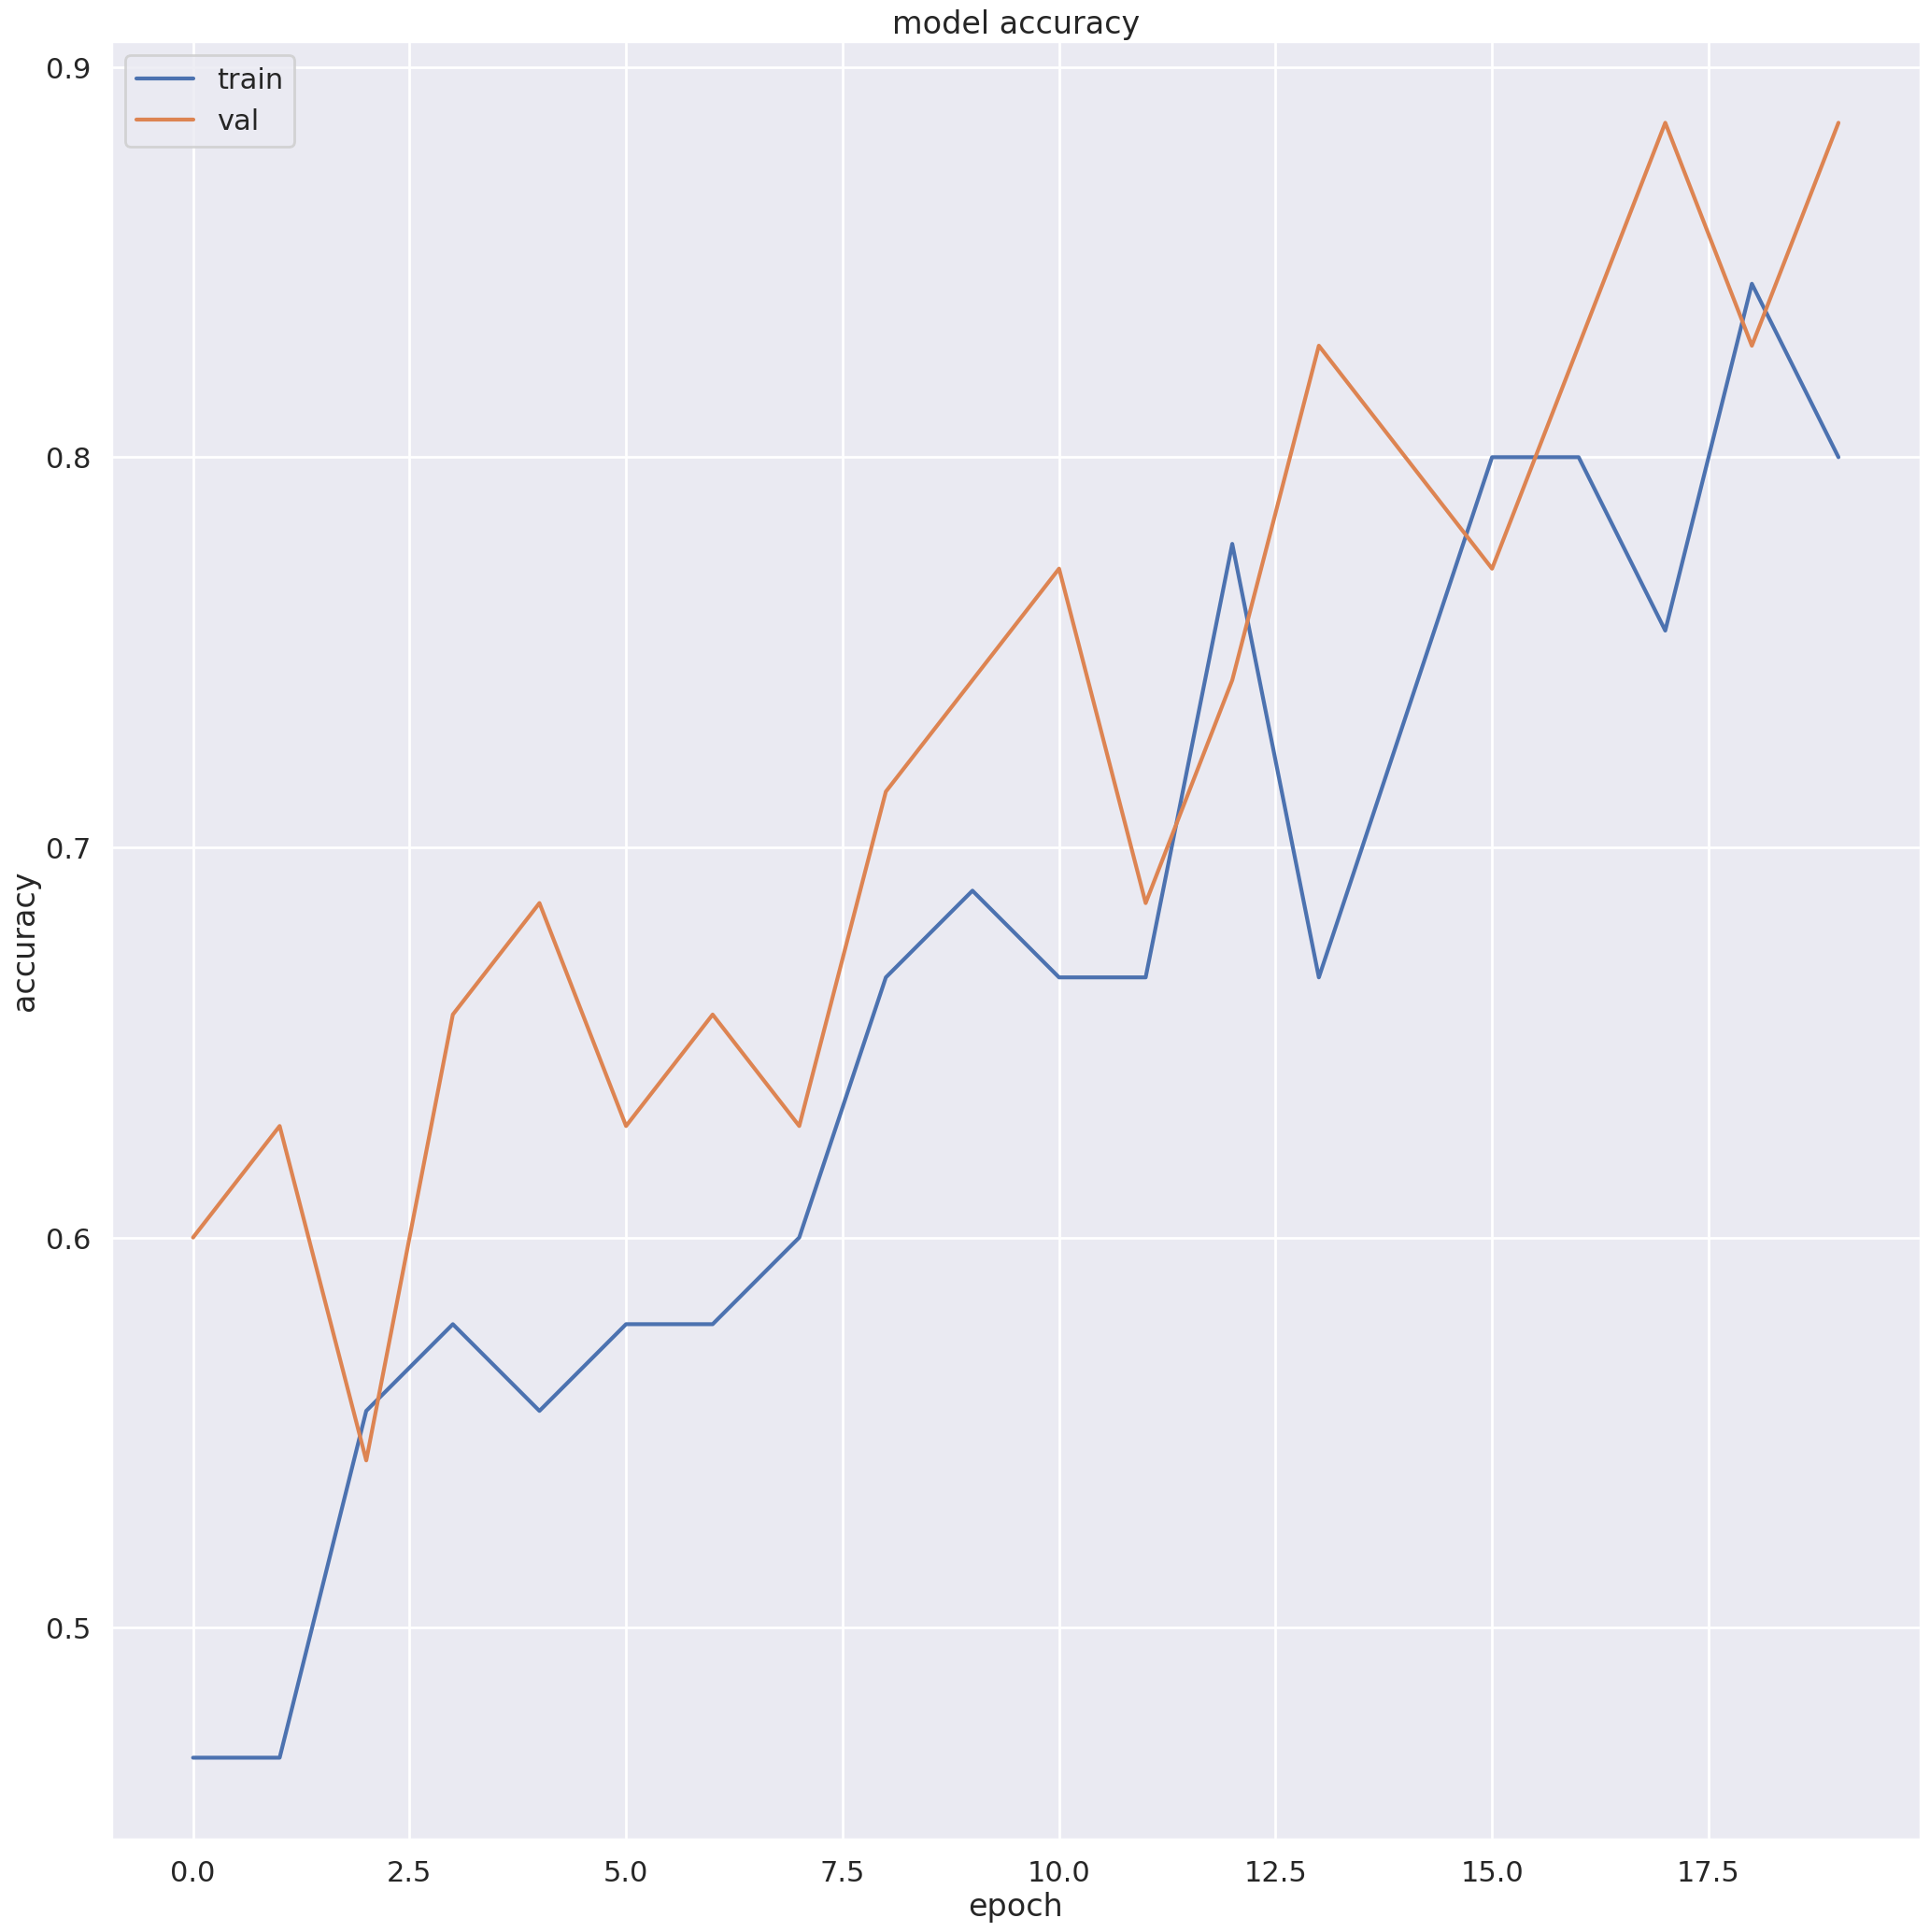

In [13]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model.save("my_model.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/mushdata/test/drybubble/download (3).jpg')

In [16]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 129ms/step


array([2.7710266e-07, 4.8227590e-03, 8.7865168e-01, 1.1652527e-01],
      dtype=float32)

In [17]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'bacterialblotch', 1: 'cobweb', 2: 'drybubble', 3: 'greenmould'}

In [18]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

drybubble


In [19]:
import socket

def is_port_available(port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        return s.connect_ex(('localhost', port)) != 0

port = 8502  # Change this to your desired port number
if is_port_available(port):
    print(f"Port {port} is available.")
else:
    print(f"Port {port} is already in use.")


Port 8502 is available.


In [21]:
with open('app.py', 'w') as f:
    f.write(_i)

In [20]:
labels = {0: 'bacterialblotch', 1: 'cobweb', 2: 'drybubble', 3: 'greenmould'}
import streamlit as st
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image


# Load the Keras model
model_path = 'my_model.hdf5'
try:
    model = load_model(model_path)
except Exception as e:
    st.error(f"Error loading model: {e}")

# Function to preprocess the image
def preprocess_image(image):
    img = load_img(image, target_size=(225, 225))
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Function to make predictions
def predict(image_path):
    """try:
        processed_image = preprocess_image(image_path)
        prediction = model.predict(processed_image)
        return prediction"""
    try:
        processed_image = preprocess_image(image_path)
        prediction = model.predict(processed_image)

        # Modify this part to return the class name instead of the numerical prediction
        predicted_class_index = np.argmax(prediction)
        predicted_class_name = labels[predicted_class_index]  # Get the class name from the dictionary
        return predicted_class_name
    except Exception as e:
        st.error(f"Prediction error: {e}")

# Main function to run the Streamlit app
def main():
    st.title('Image Classification App')
    st.write('Upload an image for classification')

    # File uploader
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        image = np.array(Image.open(uploaded_file))
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Perform prediction when 'Predict' button is clicked
        if st.button('Predict'):
            prediction = predict(uploaded_file)
            st.write('Prediction:', prediction)

if __name__ == '__main__':
    main()




2024-04-11 10:41:34.136 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [22]:
!streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 4.279s
your url is: https://purple-dolls-crash.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.109.240:8501

2024-04-11 10:42:54.176686: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 10:42:54.176758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 10:42:54.179688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 10:42:55.622939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==================

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

# Load the model
model_path = '/content/my_model.hdf5'
model = load_model(model_path)

# Load and preprocess your test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/mushdata/test',
                                                  target_size=(225, 225),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print('Test Accuracy:', accuracy)

# Generate predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)


Found 44 images belonging to 4 classes.
2/2 [==============================] - 2s 315ms/step - loss: 0.5642 - accuracy: 0.8636
Test Accuracy: 0.8636363744735718


2/2 [==============================] - 2s 330ms/step
Confusion Matrix:
[[12  1  0  1]
 [ 0 10  2  1]
 [ 1  0  9  0]
 [ 0  0  0  7]]
